## Nama : Dhiya Thufa Arimbi
## Tugas : Study Group 3 Machine Learning

In [53]:
import pandas as pd

In [54]:
from google.colab import files
dataset = files.upload()

Saving usa_rain_prediction_dataset_2024_2025.csv to usa_rain_prediction_dataset_2024_2025 (1).csv


In [55]:
df = pd.read_csv("usa_rain_prediction_dataset_2024_2025.csv")
df

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [57]:
df.isnull().sum()

,0
Date,0
Location,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation,0
Cloud Cover,0
Pressure,0
Rain Tomorrow,0


In [58]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [59]:
# Import necessary libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Ignore warnings to keep the notebook clean
warnings.filterwarnings("ignore")

# Set visualization styles
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

In [60]:
import plotly.express as px

fig = px.box(df, x='Location', y='Precipitation', title='Rainfall Distribution Across Cities in USA')
fig.show(renderer='colab')

Penyebaran Curah Hujan Antar Kota di USA:

1. Box plot menunjukkan distribusi curah hujan (precipitation) di berbagai lokasi (kota) yang ada dalam dataset.
2. Titik tengah (median) pada box plot menunjukkan nilai curah hujan rata-rata di masing-masing kota paling tinggi Indianapolis.
3. Rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) menunjukkan variasi curah hujan yang paling banyak terjadi di setiap kota, hujan paling banyak terjadi di kota Charlotte atau bisa dibilang memiliki rentang yang lebih lebar, menandakan adanya perbedaan yang signifikan dalam jumlah curah hujan antara waktu atau musim yang berbeda.
4. Distribusi Kota dengan Curah Hujan Tinggi atau Rendah
Kota-kota dengan median curah hujan yang lebih tinggi cenderung mengalami lebih banyak hujan sepanjang tahun (Indianapolis), sedangkan kota dengan median lebih rendah cenderung memiliki musim hujan yang lebih pendek atau lebih jarang (New York).

In [61]:
# Mengelompokkan data berdasarkan kota dan menghitung rata-rata curah hujan
avg_rainfall_by_city = df.groupby('Location')['Precipitation'].mean().sort_values(ascending=False).reset_index()

# Mendapatkan 10 kota dengan curah hujan tertinggi dan terendah
top_cities = avg_rainfall_by_city.head(10)
bottom_cities = avg_rainfall_by_city.tail(10)

# Visualisasi: 10 Kota dengan Curah Hujan Tertinggi
fig = px.bar(top_cities, x='Location', y='Precipitation', title='Top 10 Cities with Highest Rainfall')
fig.show(renderer='colab')

# Visualisasi: 10 Kota dengan Curah Hujan Terendah
fig = px.bar(bottom_cities, x='Location', y='Precipitation', title='Top 10 Cities with Lowest Rainfall')
fig.show(renderer='colab')

1. 10 Kota di USA dengan Curah Hujan Tertinggi ialah Indianapolis, Chicago, Charlotte, Seattle, San Diego, Washington D.C., Philadelphia, Jacksonville, San Fransisco, Los Angeles. Kota-kota ini mungkin terletak di daerah yang memiliki musim hujan panjang atau dipengaruhi oleh kondisi geografis tertentu, seperti daerah tropis atau dekat dengan laut.

2. 10 Kota di USA dengan curah Hujan terendah ialah Dallas, Columbus, Phoenix, Denver, San Jose, Houston, Fort Worth, Austin, San Antonio, New York. Kota-kota ini mungkin berada di daerah yang lebih kering, seperti gurun atau wilayah dengan iklim lebih stabil tanpa banyak variasi musim hujan.

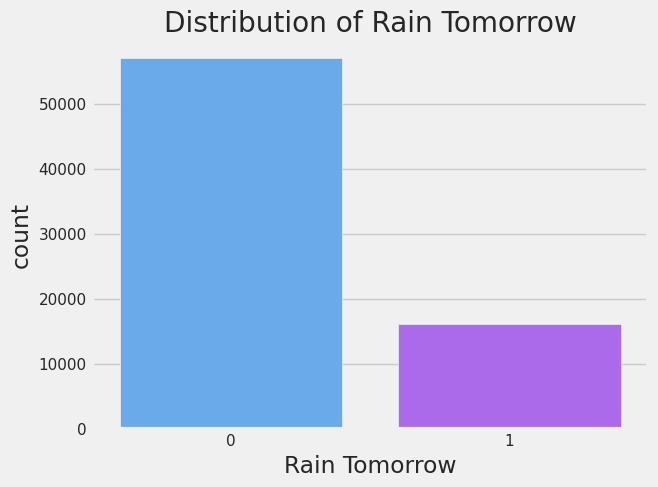

In [62]:
sns.countplot(x='Rain Tomorrow', data=df, palette='cool')
plt.title('Distribution of Rain Tomorrow')
plt.show()

1. **Distribusi Hujan Besok**:
   - menunjukkan berapa banyak data yang menunjukkan kemungkinan hujan (Rain Tomorrow = 1) dan tidak hujan (Rain Tomorrow = 0).
   - distribusi menunjukkan keseimbangan antara cuaca cerah dan hujan, atau mungkin ada ketidakseimbangan.

2. **Potensi Ketidakseimbangan**:
   - Jika salah satu kategori (hujan atau tidak hujan) lebih dominan daripada yang lainnya, menunjukkan bahwa model prediksi cuaca (jika ada) perlu dioptimalkan agar dapat bekerja dengan lebih seimbang.
   - Misalnya, jika lebih banyak data dengan "tidak hujan" (Rain Tomorrow = 0), menjadi tantangan untuk model yang digunakan untuk meramalkan hujan.

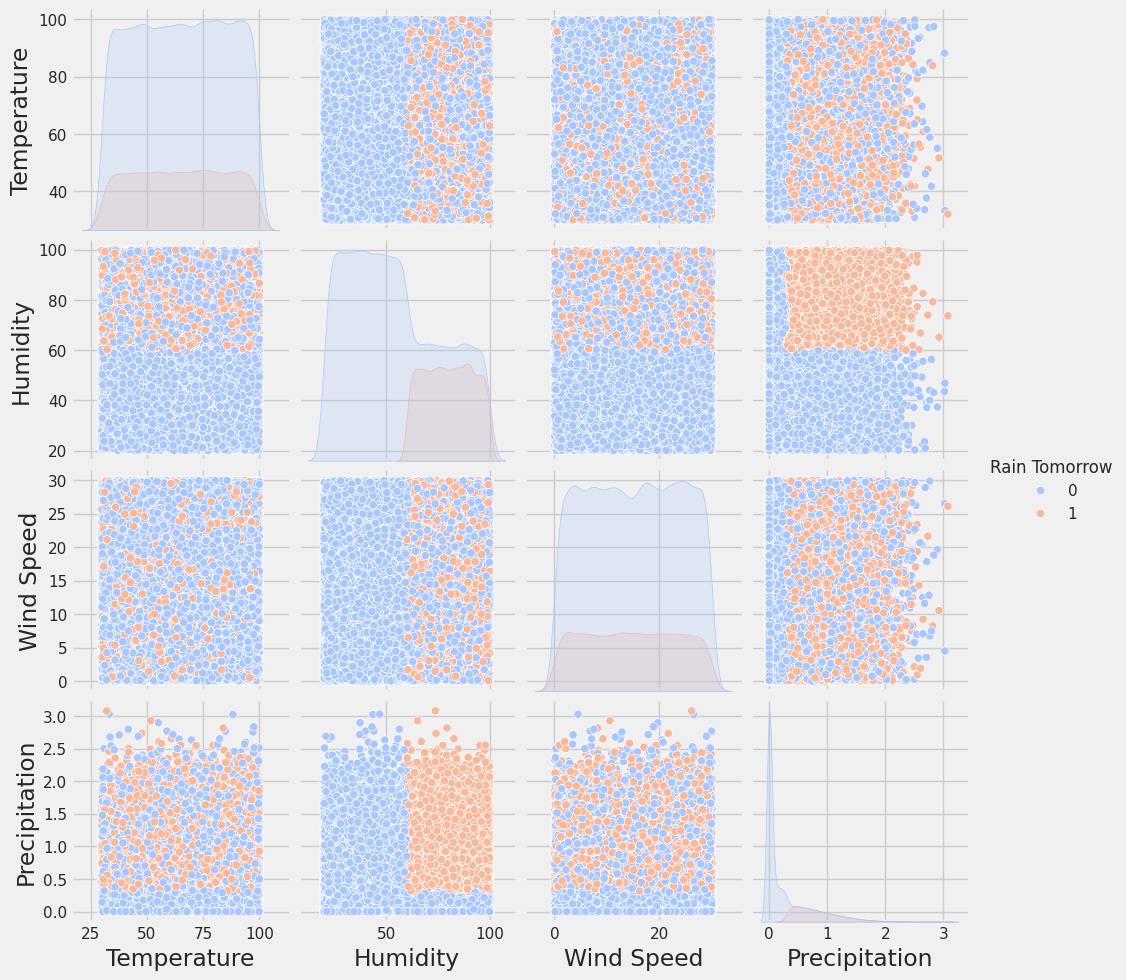

In [63]:
sns.pairplot(df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Rain Tomorrow']], hue='Rain Tomorrow', palette='coolwarm')
plt.show()

Hubungan Antar Variabel:

1. Temperature vs. Humidity dengan suhu yang lebih tinggi diikuti oleh kelembapan yang lebih rendah, tetapi beberapa kasus terjadi bersama kelembapan tinggi, terutama saat ada hujan.
2. Temperature vs. Wind Speed pola di mana suhu yang sangat tinggi atau rendah bisa diikuti oleh kecepatan angin yang rendah atau tinggi, tergantung pada kondisi cuaca tertentu.
3. Precipitation vs. Rain Tomorrow ketika ada hujan (Rain Tomorrow = 1), curah hujan (Precipitation) akan lebih tinggi yang menunjukkan bahwa curah hujan saat tersebutmberhubungan erat dengan kemungkinan hujan besok.
Pola yang Terlihat Berdasarkan 'Rain Tomorrow': Jika sebagian besar data dengan Rain Tomorrow = 1 (hujan besok) menunjukkan Precipitation yang lebih tinggi, artinya curah hujan saat ini mempengaruhi kemungkinan hujan besok.
4. Temperature dan Humidity juga menunjukkan pola yang berbeda ketika hujan diprediksi. Misalnya, kelembapan yang tinggi  menunjukkan bahwa hujan lebih mungkin terjadi.

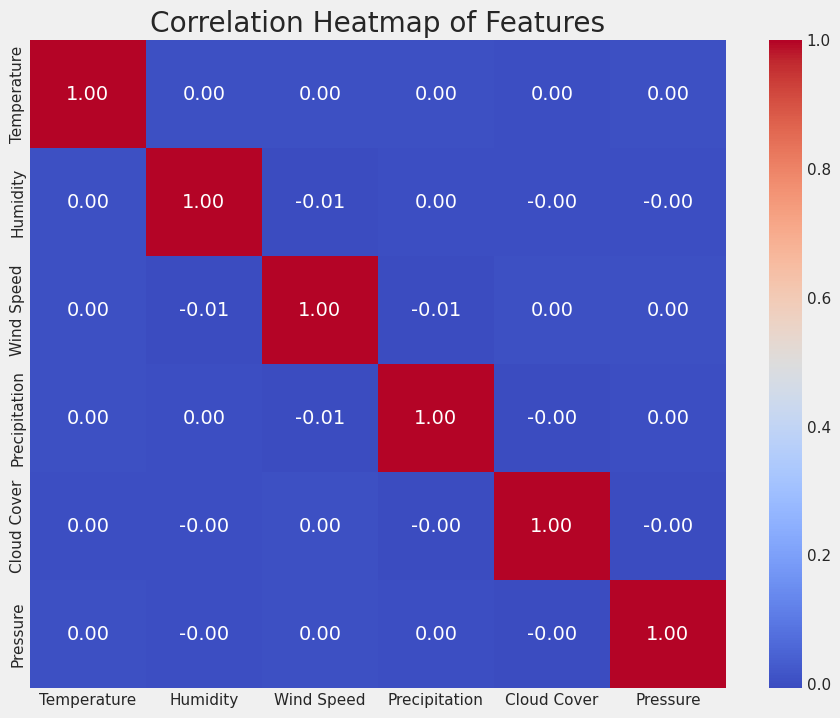

In [64]:
numeric_df = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']]

# Plot heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

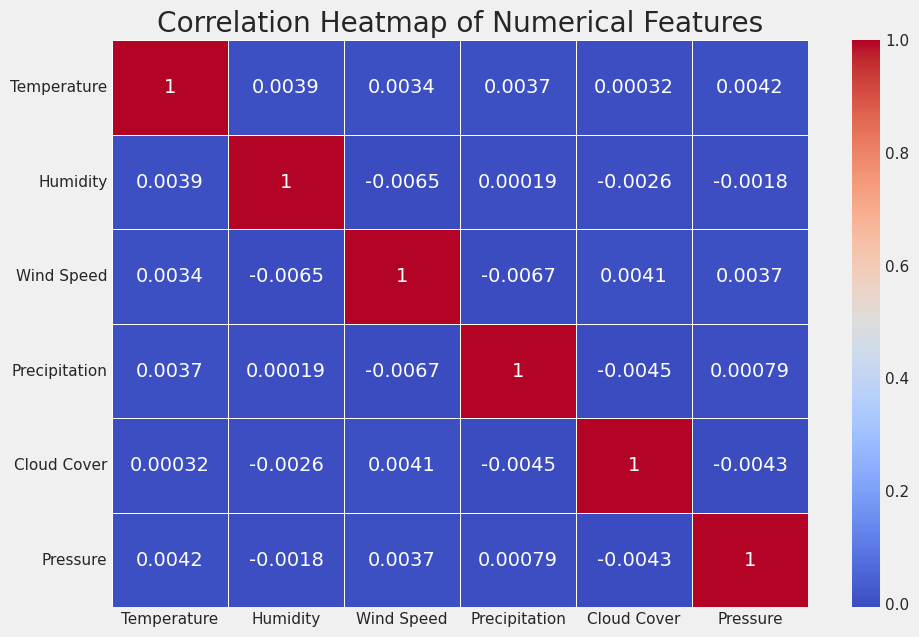

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select only numerical features from the DataFrame for the correlation matrix
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']

# Compute correlation matrix for the numerical features
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Korelasi Positif dan Negatif:
1. Temperature & Humidity: Korelasi antara suhu dan kelembapan menunjukkan bahwa suhu tinggi cenderung menurunkan kelembapan udara, tetapi di beberapa kondisi bisa juga menunjukkan hubungan positif, misalnya pada saat cuaca sangat lembap.
2. Temperature & Precipitation menunjukkan bahwa suhu yang lebih tinggi dapat berhubungan dengan curah hujan yang lebih rendah di beberapa area, tetapi bisa berbalik saat ada sistem cuaca tertentu.
3. Wind Speed & Precipitation menunjukkan bahawa Angin yang kuat dapat mempercepat pergerakan sistem cuaca, yang dapat mempengaruhi curah hujan.
4. Korelasi Antara Cloud Cover dan Precipitation menunjukkanlebih banyak awan cenderung menghasilkan lebih banyak curah hujan.
5. Pressure & Wind Speed menunjukkan korelasi untuk perubahan tekanan atmosfer akan mempengaruhi kecepatan angin. karena tekanan rendah sering dikaitkan dengan cuaca buruk dan angin kencang, sementara tekanan tinggi sering kali mengarah ke cuaca lebih tenang.
